## Import libraries 

In [67]:
# Standard Libraries
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# Kaggle API
from kaggle.api.kaggle_api_extended import KaggleApi

# Scikit-learn Libraries for Machine Learning
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Configurations and Styling
pd.set_option('display.max_columns', None)  # Show all columns in the dataframe
sns.set(palette='dark')
sns.set_theme(style="darkgrid")

## Extract data from Kaggle

In [68]:
# Authentification in Kaggle
api = KaggleApi()
api.authenticate()

# Download the DataSet to be analice
api.dataset_download_files('uciml/breast-cancer-wisconsin-data', path='breast_cancer_wisconsin_(diagnostic)_data_set', unzip=True)

## Load data to the notebook and first impressions

In [69]:
# Load the data to a dataframe
data = pd.read_csv('breast_cancer_wisconsin_(diagnostic)_data_set/data.csv')

# Show the firsts lines of the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Of this first information we can conclude some things:
- There are one column named `Unnamed: 32`  without information so we can delete this
- The other columns doesn´t have null information
- Our objective column for the logistic regression can be `diagnosis` and this have two options M = malignant, B = benign, we can convert this information to a binary options for the algorithm
- We can delete the `id` column because is a random variable and not useful for our algorithm

# Pre-procesing data

In [71]:
# Delete columns id and Unnamed: 32
data.drop(columns=['id', 'Unnamed: 32'], inplace=True)

# Transform the diagnostic column to binary values
data['diagnosis'].replace(['M','B'], [1, 0], inplace=True)

In [72]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Correlations between variables

In [73]:

# Calculate the matrix of correlations
correlation_matrix = data.corr()

# There are many variables, we will see if we can clean some of this
# Filter the correlations greater than 0.9
threshold = 0.9
filter_correlations = correlation_matrix[((correlation_matrix >= threshold) & (correlation_matrix < 1))]

# Elimina las correlaciones de una variable consigo misma
filter_correlations = filter_correlations.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Imprime las correlaciones filtradas
filter_correlations


,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,concave points_worst
radius_mean,NaN,NaN,0.997855,0.987357,NaN,NaN,NaN,NaN,NaN,0.969539,NaN,0.965137,0.941082,NaN
texture_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912045,NaN,NaN,NaN
perimeter_mean,0.997855,NaN,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,0.969476,NaN,0.970387,0.941550,NaN
area_mean,0.987357,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,0.962746,NaN,0.959120,0.959213,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave points_mean,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910155
radius_se,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972794,0.951830,NaN,NaN,NaN,NaN,NaN
perimeter_se,NaN,NaN,NaN,NaN,NaN,NaN,0.972794,NaN,0.937655,NaN,NaN,NaN,NaN,NaN
area_se,NaN,NaN,NaN,NaN,NaN,NaN,0.951830,0.937655,NaN,NaN,NaN,NaN,NaN,NaN
radius_worst,0.969539,NaN,0.969476,0.962746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993708,0.984015,NaN


#### In this correlation matrix, we observe strong correlations among several variables, which enables us to describe the behavior of one variable in terms of another. Consequently, I will utilize 'radius_mean' to represent the behavior of 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', and 'area_worst'. Similarly, 'radius_se' will be used to characterize the behavior of 'perimeter_se' and 'area_se'

In [74]:
# Delete the variables perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst, perimeter_se and area_se
data.drop(columns=['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'perimeter_se', 'area_se'], inplace=True)
data

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


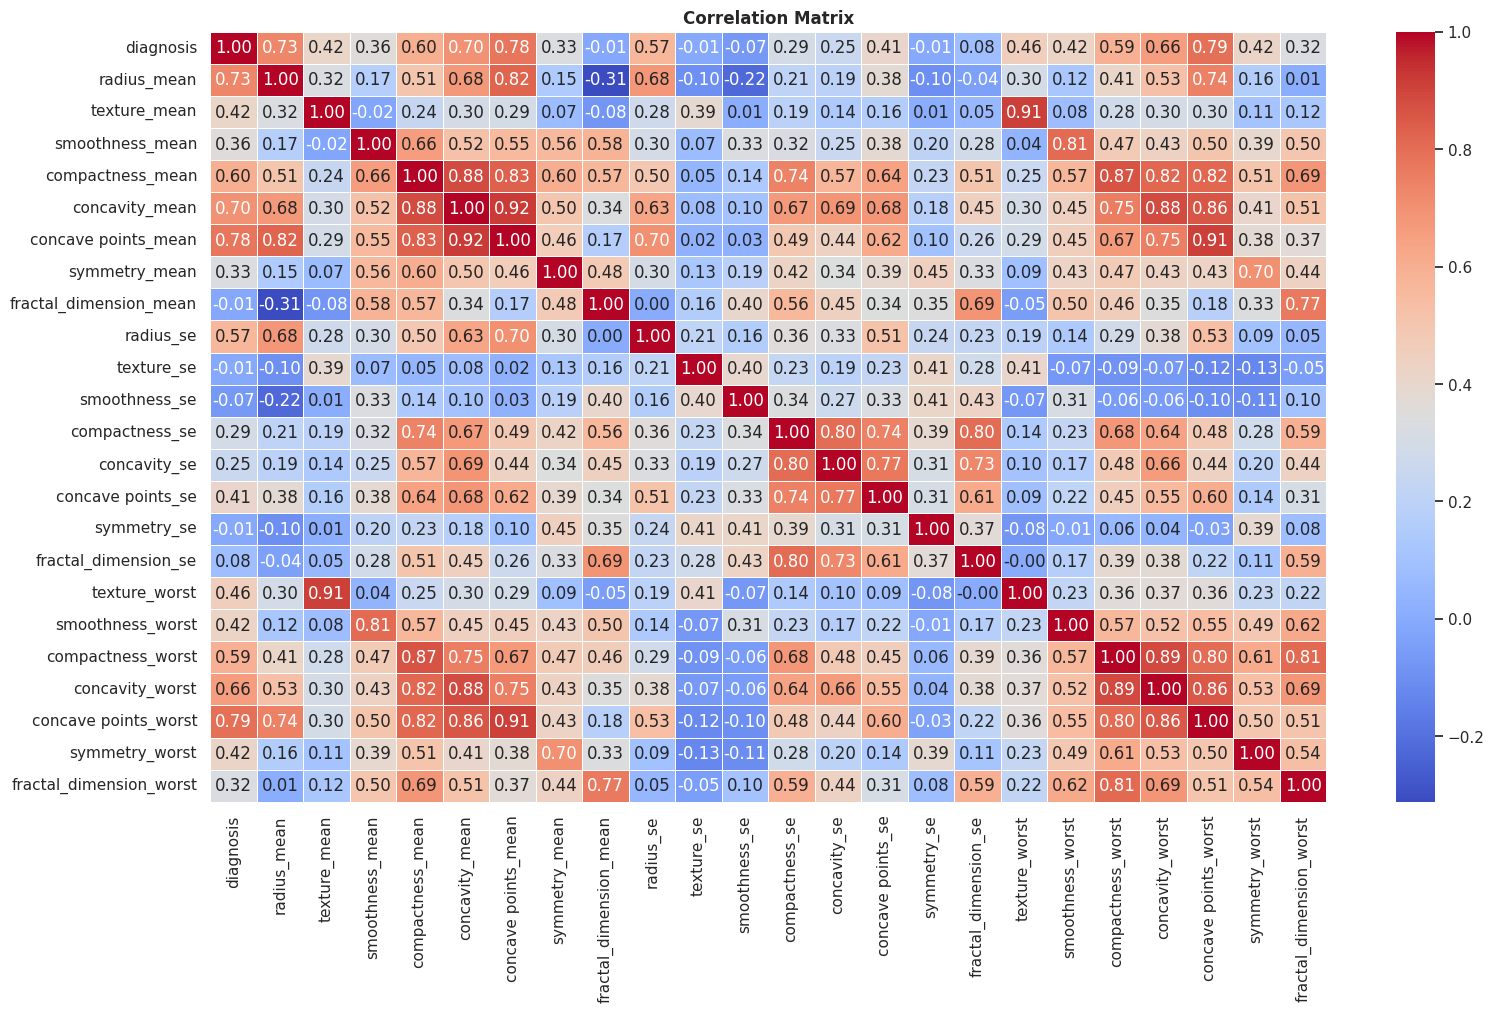

In [75]:
# Calculate the matrix of correlations
correlation_matrix = data.corr()

# Create a Headmap
plt.figure(figsize=(18, 10))  # Tamaño del heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontweight='bold')
plt.show()

In the graphic, a high correlation is observed among certain variables, which is beneficial for logistic regression algorithms since they assume a linear correlation between the predictors. It is particularly noteworthy to examine the correlation between our target variable and other predictors. This allows us to identify the most influential variables for classification, such as concave features, compactness and the radius variable, the latter of which represents additional variables.

let's see the correlation among objective variable  and the other variables:

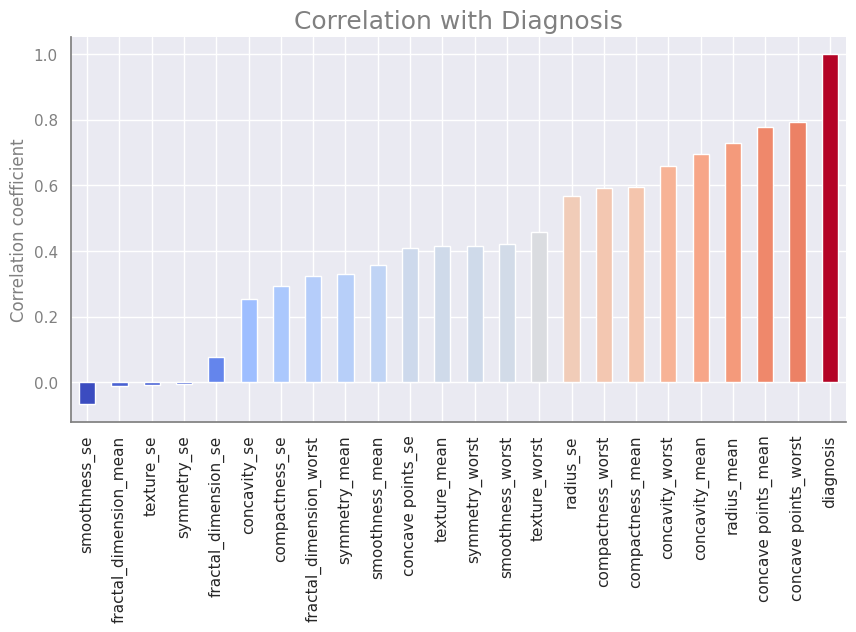

In [76]:
# Sort the correlation of diagnosis graphic with others variables
correlation_series = data.corr()['diagnosis'].sort_values()

# Colors for the graphic
cmap = plt.colormaps['coolwarm']
norm = mcolors.Normalize(vmin=correlation_series.min(), vmax=correlation_series.max())
colors = [cmap(norm(value)) for value in correlation_series]

#  Create a layout
fig, ax = plt.subplots(figsize=(10,5))
correlation_series.plot(kind='bar', color=colors, ax=ax)

# Design
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x')
ax.set_title('Correlation with Diagnosis', fontsize=18, color='gray')
ax.set_ylabel('Correlation coefficient', fontsize=12, color='gray')

# Show graphic
plt.show()


Let's rescale the data to range between 0 and 1. This step will help ensure that all variables have equal importance for the algorithm, leading to potentially better performance and more balanced results.

In [77]:
# Scaling the data
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(data)

# Convert again to a dataframe format
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)
df_data_processing_scaled.columns = data.columns # Restore the original columns
df_data_processing_scaled.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.141525,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.303571,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.360075,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.385928,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.123934,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


#### This graphic is only to see the behavior among variables respect the diganosis, but is so bad for report because is confused and there are many variables

In [78]:
# fig = plt.figure(figsize=(10,10))
# sns.pairplot(data= df_data_processing_scaled, hue='diagnosis')
# plt.show()

Although the graphic appears cluttered, we can observe that some pairs of variables distinctly differentiate whether a person has breast cancer or not.

### Training the algorithm

In [79]:
# Dividing the target variable from the others
X = df_data_processing_scaled.drop('diagnosis',axis=1) 
y = df_data_processing_scaled['diagnosis'].values # Objective variable

Split the data to train and  test

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Fit the model

In [81]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

### Evaluate  results 

In [82]:
prediction_test = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,prediction_test )
print(f'Accuracy {accuracy:.3f} %')

Accuracy 0.965 %


In [86]:
# Obtain probabilities using predict_proba method
probabilities = model.predict_proba(X_test)

# Convert the probabilities into a Pandas DataFrame
# Assigning appropriate column names for the probabilities of each class (e.g., 0 and 1)
prob_df = pd.DataFrame(probabilities, columns=['Prob_0', 'Prob_1'])

# Display the DataFrame for a better-organized view of the probabilities
print('Probability of data to be 0 or 1')
display(prob_df)


Probability of data to be 0 or 1


,Prob_0,Prob_1
0,0.790606,0.209394
1,0.122906,0.877094
2,0.198833,0.801167
3,0.936715,0.063285
4,0.971127,0.028873
...,...,...
109,0.861621,0.138379
110,0.288020,0.711980
111,0.928007,0.071993
112,0.566362,0.433638


The model of logistical regresion is interesting beacuse for the data of test, we can see the probability to be 0 or 1